In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-05-19 / Aki Taanila


# Bollinger bands

Tässä muistiossa noudetaan dataa Yahoo Finance -palvelusta **yfinance**-paketin avulla. **yfinance**-kirjaston asennus Minicondan ja Anacondan käyttäjille komentorivin kautta: `pip install yfinance`. Lisätietoa https://github.com/ranaroussi/yfinance.

Jos tiedon hakuu Yahoo Finance -palvelusta ei onnistu, niin kannattaa päivittää yfinance uusimpaan versioon. Minicondan/Anacondan komentorivillä päivityksen voi tehdä komennolla `pip install yfinance --upgrade`
Lisätietoa Bollingerin nauhoista:  https://www.investopedia.com/terms/b/bollingerbands.asp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('whitegrid')

In [3]:
def bollinger1(stock, span = 20):
    
    stock['MA'] = stock['Close'].rolling(span).mean()
    stock['STD'] = stock['Close'].rolling(span).std(ddof = 0) 
    stock['Upper'] = stock['MA'] + (stock['STD'] * 2)
    stock['Lower'] = stock['MA'] - (stock['STD'] * 2)

    # Kaavio
    stock['Close'].plot(label = 'Close', color = 'black', figsize = (10, 6))
    stock['Upper'].plot(label = 'Upper', linestyle = '--', linewidth = 1, color = 'red')
    stock['MA'].plot(label = 'Middle', linestyle = '--', linewidth = 1.2, color = 'grey')
    stock['Lower'].plot(label = 'Lower', linestyle = '--', linewidth = 1, color = 'red')
    plt.gca().fill_between(stock.index, stock['Lower'], stock['Upper'], facecolor = 'yellow', alpha = 0.1)
    plt.legend()
    plt.title('BOLLINGER BANDS')

In [4]:
stock = yf.download('ELISA.HE', start = '2025-1-1', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


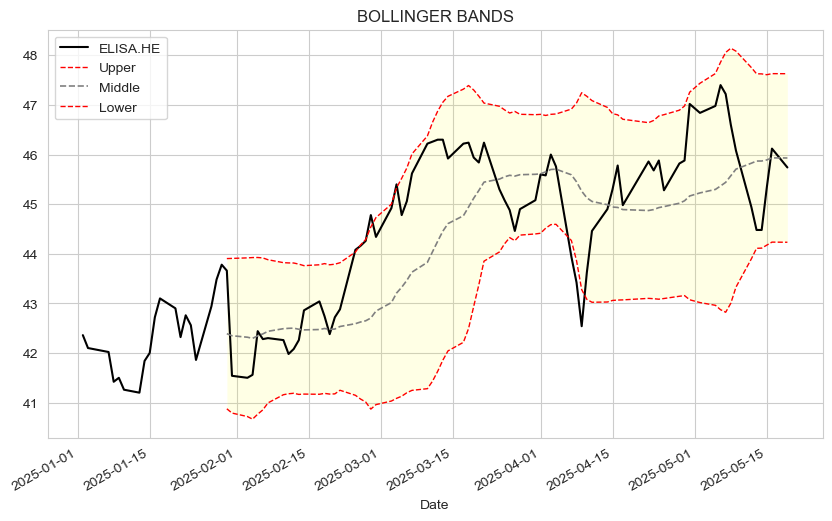

In [5]:
bollinger1(stock)